# Retrieving, Cleaning and Modeling Data

## Importing packages and getting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
satellite = pd.read_excel('../data/UCS-Satellite-Database-8-1-2020.xls')

satellite.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name of Satellite, Alternate Names  2787 non-null   object        
 1   Current Official Name of Satellite  2787 non-null   object        
 2   Country/Org of UN Registry          2787 non-null   object        
 3   Country of Operator/Owner           2787 non-null   object        
 4   Operator/Owner                      2787 non-null   object        
 5   Users                               2787 non-null   object        
 6   Purpose                             2787 non-null   object        
 7   Detailed Purpose                    797 non-null    object        
 8   Class of Orbit                      2787 non-null   object        
 9   Type of Orbit                       2162 non-null   object        
 10  Longitude of GEO (degree

In [4]:
satellite.columns.str.replace(' ', '')
satellite.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 28',
       'Source Used for Orbital Data', 'Source', 'Unnamed: 31', 'Source.1',
       'Source.2', 'Source.3', 'Source.4', 'Source.5', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',

## Cleaning

In [5]:
satellite.drop(['Name of Satellite, Alternate Names','Operator/Owner','Users','Purpose','Class of Orbit','Detailed Purpose',
                'Country/Org of UN Registry','Contractor','Country of Contractor',
                'Launch Site','Launch Vehicle','Type of Orbit',
                'Dry Mass (kg.)', 'Power (watts)',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 28',
       'Source Used for Orbital Data', 'Source', 'Unnamed: 31', 'Source.1',
       'Source.2', 'Source.3', 'Source.4', 'Source.5', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66'],axis=1,inplace=True)

satellite.head()

,Current Official Name of Satellite,Country of Operator/Owner,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.)
0,1HOPSAT,USA,0.0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,0.5
1,3Cat-1,Spain,0.0,476.0,500.0,0.001750,97.40,95.00,4.0,2018-11-29,NaN
2,Aalto-1,Finland,0.0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,2.0
3,AAUSat-4,Denmark,0.0,442.0,687.0,0.017665,98.20,95.90,1.0,2016-04-25,NaN
4,ABS-2,Multinational,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,15.0


In [6]:
satellite = satellite.rename(columns= {'Expected Lifetime (yrs.)':'Expected Lifetime','Country of Operator/Owner':'Country',
                                      'Current Official Name of Satellite':'Name of Satellite'})
satellite.head()


,Name of Satellite,Country,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime
0,1HOPSAT,USA,0.0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,0.5
1,3Cat-1,Spain,0.0,476.0,500.0,0.001750,97.40,95.00,4.0,2018-11-29,NaN
2,Aalto-1,Finland,0.0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,2.0
3,AAUSat-4,Denmark,0.0,442.0,687.0,0.017665,98.20,95.90,1.0,2016-04-25,NaN
4,ABS-2,Multinational,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,15.0


In [7]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name of Satellite           2787 non-null   object        
 1   Country                     2787 non-null   object        
 2   Longitude of GEO (degrees)  2787 non-null   float64       
 3   Perigee (km)                2787 non-null   float64       
 4   Apogee (km)                 2787 non-null   float64       
 5   Eccentricity                2787 non-null   float64       
 6   Inclination (degrees)       2787 non-null   float64       
 7   Period (minutes)            2787 non-null   float64       
 8   Launch Mass (kg.)           2580 non-null   float64       
 9   Date of Launch              2787 non-null   datetime64[ns]
 10  Expected Lifetime           1148 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage

In [8]:
satellite = satellite.dropna()
satellite.head()

,Name of Satellite,Country,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime
0,1HOPSAT,USA,0.0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,0.5
2,Aalto-1,Finland,0.0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,2.0
4,ABS-2,Multinational,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,15.0
5,ABS-2A,Multinational,-75.0,35700.0,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,15.0
6,ABS-3A,Multinational,-3.0,35788.0,35803.0,0.000178,0.10,1436.00,2000.0,2015-03-02,15.0


In [9]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 2785
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name of Satellite           1124 non-null   object        
 1   Country                     1124 non-null   object        
 2   Longitude of GEO (degrees)  1124 non-null   float64       
 3   Perigee (km)                1124 non-null   float64       
 4   Apogee (km)                 1124 non-null   float64       
 5   Eccentricity                1124 non-null   float64       
 6   Inclination (degrees)       1124 non-null   float64       
 7   Period (minutes)            1124 non-null   float64       
 8   Launch Mass (kg.)           1124 non-null   float64       
 9   Date of Launch              1124 non-null   datetime64[ns]
 10  Expected Lifetime           1124 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage

## Modeling
Need to get the year from the 'Date of Launch' column.


Displayed the 'Date of Launch' column to see how the year will be taken out.

In [10]:
satellite['Date of Launch'].unique()

array(['2019-12-11T00:00:00.000000000', '2017-06-23T00:00:00.000000000',
       '2014-02-06T00:00:00.000000000', '2016-06-15T00:00:00.000000000',
       '2015-03-02T00:00:00.000000000', '2004-03-13T00:00:00.000000000',
       '1999-09-26T00:00:00.000000000', '1999-09-04T00:00:00.000000000',
       '2012-05-03T00:00:00.000000000', '2013-09-18T00:00:00.000000000',
       '2018-08-22T00:00:00.000000000', '2014-06-19T00:00:00.000000000',
       '2008-12-20T00:00:00.000000000', '2007-04-25T00:00:00.000000000',
       '2010-07-12T00:00:00.000000000', '2014-07-08T00:00:00.000000000',
       '2013-04-19T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2017-12-10T00:00:00.000000000', '2016-09-26T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2013-02-07T00:00:00.000000000',
       '2014-03-22T00:00:00.000000000', '2017-09-12T00:00:00.000000000',
       '1996-09-08T00:00:00.000000000', '2004-05-19T00:00:00.000000000',
       '2004-10-14T00:00:00.000000000', '2004-12-17

Getting the year from 'Date of Launch' column and creating a new column ('Year of Launch') to hold those values

In [11]:
satellite['Year of Launch'] = satellite['Date of Launch'].dt.year

satellite["Year of Launch"]

0       2019
2       2017
4       2014
5       2016
6       2015
        ... 
2767    2019
2769    2017
2783    2019
2784    2012
2785    2016
Name: Year of Launch, Length: 1124, dtype: int64

In [12]:
satellite.to_csv('../data/Modified_Satellite_Database.csv')
satellite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 2785
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name of Satellite           1124 non-null   object        
 1   Country                     1124 non-null   object        
 2   Longitude of GEO (degrees)  1124 non-null   float64       
 3   Perigee (km)                1124 non-null   float64       
 4   Apogee (km)                 1124 non-null   float64       
 5   Eccentricity                1124 non-null   float64       
 6   Inclination (degrees)       1124 non-null   float64       
 7   Period (minutes)            1124 non-null   float64       
 8   Launch Mass (kg.)           1124 non-null   float64       
 9   Date of Launch              1124 non-null   datetime64[ns]
 10  Expected Lifetime           1124 non-null   float64       
 11  Year of Launch              1124 non-null   int64       

## Graphing

Displayed columns to get the right column values for the graph.

In [13]:
satellite.columns

Index(['Name of Satellite', 'Country', 'Longitude of GEO (degrees)',
       'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)',
       'Period (minutes)', 'Launch Mass (kg.)', 'Date of Launch',
       'Expected Lifetime', 'Year of Launch'],
      dtype='object')

'Year of Launch' and 'Expected Lifetime' values used for a scatter graph.

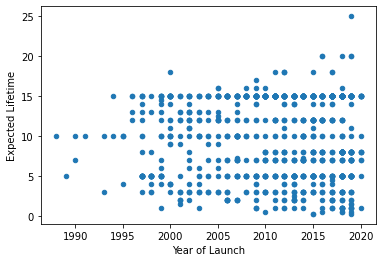

In [14]:
satellite.plot(kind = 'scatter', x = 'Year of Launch', y= 'Expected Lifetime')
plt.savefig('../graphs/scatter.png')

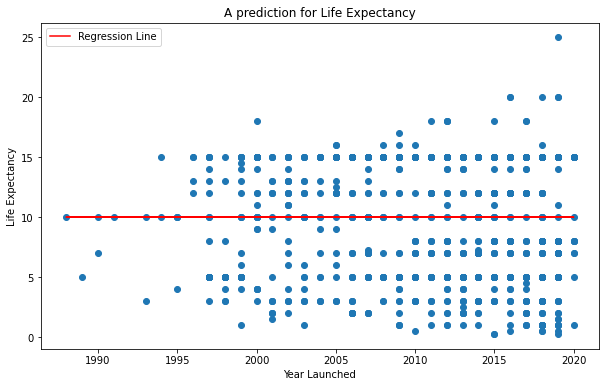

In [15]:
from utils import draw_line
year = satellite['Year of Launch'].values
life = satellite['Expected Lifetime'].values

draw_line(year, life, slope= 0, intercept = 10, figsize = (10,6) )


In [16]:
## This time we will use statsmodels api

import statsmodels.api as sm
X = satellite[['Year of Launch', 'Expected Lifetime']]
y = satellite['Expected Lifetime']
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Expected Lifetime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.397e+30
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:57:03   Log-Likelihood:                 32367.
No. Observations:                1124   AIC:                        -6.473e+04
Df Residuals:                    1121   BIC:                        -6.471e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -6.3e-12   6.91e-13     -9.118      0.000   -7.66e-12   -4.94e-12
Year of Launch     3.097e-15   3.44e-16      9.015      0.000    2.42e-15    3.77e-15
Expected Lifetime     1.0000   4.57e-16   2.19e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      101.390   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.734
Skew:                           0.826   Prob(JB):                     1.11e-28
Kurtosis:                       2.862   Cond. No.                     6.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

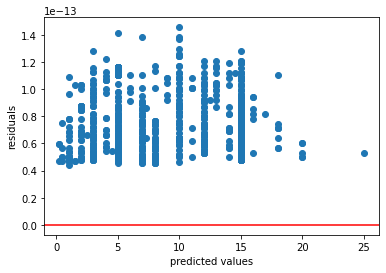

In [17]:
residuals = res.resid
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0,color = 'red', label = '0')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show

In [18]:
ncols = 14
nrows = 15
X = np.zeros(shape = (nrows,ncols))
for i in range(ncols):
    X[:,i] = np.random.normal(size = nrows)
    
y = np.random.normal(size = nrows)

# modified OLS Regression results
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     71.90
Date:                Sat, 05 Dec 2020   Prob (F-statistic):             0.0921
Time:                        17:17:38   Log-Likelihood:                 29.839
No. Observations:                  15   AIC:                            -31.68
Df Residuals:                       1   BIC:                            -21.77
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1852      0.135     -1.371      0.4

C:\Users\cappy\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
